In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
df = pd.read_csv('nse.csv')


In [28]:
df.head()

,Date,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,LICI,ITC,...,COOLCAPS,ALLETEC,20MICRONS,VIKASECO,ORIENTBELL,DONEAR,CAREERP,INTLCONV,SHREEPUSHK,PRITIKAUTO
0,1991-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1991-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1991-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1991-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.shape

(8470, 1418)

In [30]:
df['Date'] = pd.to_datetime(df['Date'])

In [31]:
df['Date']

0      1991-01-02
1      1991-01-03
2      1991-01-04
3      1991-01-07
4      1991-01-08
          ...    
8465   2024-07-01
8466   2024-07-02
8467   2024-07-03
8468   2024-07-04
8469   2024-07-05
Name: Date, Length: 8470, dtype: datetime64[ns]

In [32]:
df.head()

,Date,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,LICI,ITC,...,COOLCAPS,ALLETEC,20MICRONS,VIKASECO,ORIENTBELL,DONEAR,CAREERP,INTLCONV,SHREEPUSHK,PRITIKAUTO
0,1991-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1991-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1991-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1991-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
missing_values = df.isnull().sum()

In [34]:
missing_percentage = (missing_values/len(df))*100

In [35]:
df_cleaned = df.loc[:, missing_percentage<=50]

In [36]:
missing_values

Date             0
RELIANCE      1310
TCS           3034
HDFCBANK      1307
ICICIBANK     3005
              ... 
DONEAR        4147
CAREERP       5081
INTLCONV      7778
SHREEPUSHK    6297
PRITIKAUTO    7753
Length: 1418, dtype: int64

In [37]:
missing_percentage

Date           0.000000
RELIANCE      15.466352
TCS           35.820543
HDFCBANK      15.430933
ICICIBANK     35.478158
                ...    
DONEAR        48.961039
CAREERP       59.988194
INTLCONV      91.829988
SHREEPUSHK    74.344746
PRITIKAUTO    91.534829
Length: 1418, dtype: float64

In [38]:
df_cleaned

,Date,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,ITC,HINDUNILVR,...,JETAIRWAYS,JINDALPHOT,HCL-INSYS,ASMS,NAGAFERT,GEECEE,REMSONSIND,PTL,ORIENTBELL,DONEAR
0,1991-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1991-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1991-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1991-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8465,2024-07-01,3120.300049,3978.199951,1705.199951,1211.849976,1454.000000,841.950012,1590.800049,429.049988,2505.100098,...,42.650002,912.000000,16.850000,20.35,12.54,390.950012,203.500000,46.189999,402.799988,134.960007
8466,2024-07-02,3130.350098,4017.399902,1730.599976,1190.599976,1418.949951,826.150024,1621.050049,425.500000,2485.149902,...,42.080002,924.299988,16.920000,20.75,12.16,386.700012,208.059998,46.240002,409.799988,130.729996
8467,2024-07-03,3104.850098,3965.250000,1768.650024,1201.599976,1419.849976,839.950012,1627.400024,428.299988,2510.350098,...,42.040001,913.049988,17.010000,21.16,12.45,387.200012,204.649994,46.270000,429.350006,132.220001
8468,2024-07-04,3108.050049,4020.949951,1727.150024,1233.000000,1423.050049,839.299988,1650.650024,429.049988,2495.949951,...,41.669998,890.200012,16.840000,21.58,12.41,388.700012,214.600006,46.119999,428.750000,131.360001


In [39]:
df_cleaned_info = df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8470 entries, 0 to 8469
Columns: 612 entries, Date to DONEAR
dtypes: datetime64[ns](1), float64(611)
memory usage: 39.5 MB


In [40]:
df_cleaned.isnull().sum()

Date             0
RELIANCE      1310
TCS           3034
HDFCBANK      1307
ICICIBANK     3005
              ... 
GEECEE        4094
REMSONSIND    3003
PTL           4172
ORIENTBELL    4183
DONEAR        4147
Length: 612, dtype: int64

In [41]:
df_filled = df_cleaned.bfill()

In [42]:
df_filled

,Date,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,ITC,HINDUNILVR,...,JETAIRWAYS,JINDALPHOT,HCL-INSYS,ASMS,NAGAFERT,GEECEE,REMSONSIND,PTL,ORIENTBELL,DONEAR
0,1991-01-02,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,...,1304.199951,121.370781,19.822678,110.75,6.75,93.849998,9.400000,10.030000,69.550003,214.649994
1,1991-01-03,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,...,1304.199951,121.370781,19.822678,110.75,6.75,93.849998,9.400000,10.030000,69.550003,214.649994
2,1991-01-04,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,...,1304.199951,121.370781,19.822678,110.75,6.75,93.849998,9.400000,10.030000,69.550003,214.649994
3,1991-01-07,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,...,1304.199951,121.370781,19.822678,110.75,6.75,93.849998,9.400000,10.030000,69.550003,214.649994
4,1991-01-08,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,...,1304.199951,121.370781,19.822678,110.75,6.75,93.849998,9.400000,10.030000,69.550003,214.649994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8465,2024-07-01,3120.300049,3978.199951,1705.199951,1211.849976,1454.000000,841.950012,1590.800049,429.049988,2505.100098,...,42.650002,912.000000,16.850000,20.35,12.54,390.950012,203.500000,46.189999,402.799988,134.960007
8466,2024-07-02,3130.350098,4017.399902,1730.599976,1190.599976,1418.949951,826.150024,1621.050049,425.500000,2485.149902,...,42.080002,924.299988,16.920000,20.75,12.16,386.700012,208.059998,46.240002,409.799988,130.729996
8467,2024-07-03,3104.850098,3965.250000,1768.650024,1201.599976,1419.849976,839.950012,1627.400024,428.299988,2510.350098,...,42.040001,913.049988,17.010000,21.16,12.45,387.200012,204.649994,46.270000,429.350006,132.220001
8468,2024-07-04,3108.050049,4020.949951,1727.150024,1233.000000,1423.050049,839.299988,1650.650024,429.049988,2495.949951,...,41.669998,890.200012,16.840000,21.58,12.41,388.700012,214.600006,46.119999,428.750000,131.360001


In [43]:
df_filled.isnull().sum()

Date          0
RELIANCE      0
TCS           0
HDFCBANK      0
ICICIBANK     0
             ..
GEECEE        0
REMSONSIND    0
PTL           0
ORIENTBELL    0
DONEAR        0
Length: 612, dtype: int64

In [44]:
def identify_outliers_iqr(df, column):
    Q1 = df_filled[column].quantile(0.25)
    Q3 = df_filled[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_filled[(df[column] < lower_bound) | (df_filled[column] > upper_bound)]
    return outliers

# Apply the function to each stock price column
outliers_iqr = {}
for column in df_filled.columns:
    if column != 'Date':
        outliers_iqr[column] = identify_outliers_iqr(df_filled, column)
    

In [45]:
Q1 = df_filled.quantile(0.25)
Q3 = df_filled.quantile(0.75)
IQR = Q3 - Q1 

lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR 
df_cleaned = df_filled.clip(lower=lower_bound, upper=upper_bound, axis=1)
df_cleaned_info = df_cleaned.info()
df_cleaned_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8470 entries, 0 to 8469
Columns: 612 entries, Date to DONEAR
dtypes: datetime64[ns](1), float64(40), object(571)
memory usage: 39.5+ MB


In [46]:
df_cleaned.shape

(8470, 612)

In [47]:
basic_stats = df_filled.describe()

In [48]:
first_10_stocks = df_filled.columns[1:11]

In [49]:
df_cleaned_info = df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8470 entries, 0 to 8469
Columns: 612 entries, Date to DONEAR
dtypes: datetime64[ns](1), float64(611)
memory usage: 39.5 MB


In [50]:
basic_stats

,Date,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,ITC,HINDUNILVR,...,JETAIRWAYS,JINDALPHOT,HCL-INSYS,ASMS,NAGAFERT,GEECEE,REMSONSIND,PTL,ORIENTBELL,DONEAR
count,8470,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,...,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000
mean,2007-07-11 12:40:37.969303296,514.448543,798.467475,370.661868,200.478550,237.963422,162.517726,363.667733,114.127340,648.985285,...,795.563177,118.832691,54.664238,76.625256,13.908737,95.317461,14.728617,16.544192,122.100184,130.458937
min,1991-01-02 00:00:00,10.975116,35.474998,2.435000,20.100000,9.350544,13.346102,0.763183,4.182222,61.805000,...,13.650000,7.950000,3.350000,0.500000,2.600000,24.150000,2.020000,3.275000,14.000000,8.900000
25%,1999-02-12 18:00:00,25.584803,39.700001,7.496250,25.127272,15.681876,21.329467,19.350976,14.392500,144.949997,...,314.725006,70.050003,19.822678,12.600000,6.750000,84.300003,5.270000,10.030000,69.550003,31.350000
50%,2007-05-09 12:00:00,298.363907,216.287498,99.955002,113.527271,251.631027,110.849632,197.207817,58.183334,237.464996,...,770.849976,121.370781,19.822678,110.750000,8.650000,93.849998,9.400000,10.030000,69.550003,205.699997
75%,2015-12-06 06:00:00,497.448433,1236.475037,535.462479,256.681824,346.223610,253.587505,496.924988,216.283337,851.274994,...,1304.199951,121.370781,64.520485,110.750000,22.450001,93.849998,9.900000,19.275000,117.000000,214.649994
max,2024-07-05 00:00:00,3177.250000,4219.250000,1768.650024,1233.400024,1475.800049,905.650024,1939.500000,492.149994,2812.449951,...,1375.099976,924.299988,282.798248,283.500000,87.000000,401.250000,214.600006,84.900002,806.200012,236.149994
std,NaN,719.892388,1096.192470,510.729195,249.746445,254.427921,167.137092,457.214896,120.799684,794.411787,...,502.799105,101.980640,56.472196,55.408460,10.745623,41.647104,24.912700,12.051067,124.374667,88.591179


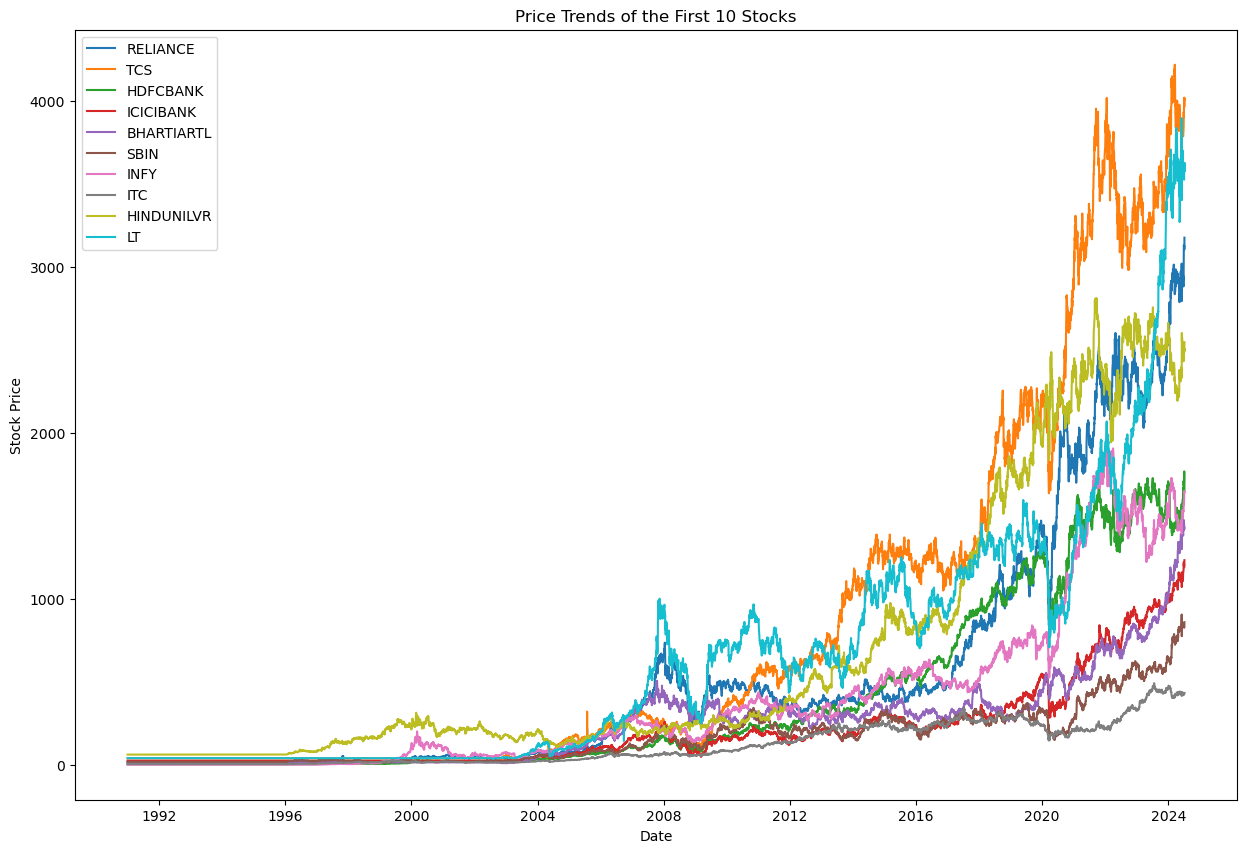

In [53]:
plt.figure(figsize=(15,10))
for stock in first_10_stocks:
    plt.plot(df_filled['Date'],df_filled[stock],label=stock)
    
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Price Trends of the First 10 Stocks')
plt.legend()
plt.show()
    

# Correlation Analysis

In [54]:
df_filled[first_10_stocks]

,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,ITC,HINDUNILVR,LT
0,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,40.435555
1,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,40.435555
2,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,40.435555
3,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,40.435555
4,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,5.583333,61.805000,40.435555
...,...,...,...,...,...,...,...,...,...,...
8465,3120.300049,3978.199951,1705.199951,1211.849976,1454.000000,841.950012,1590.800049,429.049988,2505.100098,3526.550049
8466,3130.350098,4017.399902,1730.599976,1190.599976,1418.949951,826.150024,1621.050049,425.500000,2485.149902,3626.500000
8467,3104.850098,3965.250000,1768.650024,1201.599976,1419.849976,839.950012,1627.400024,428.299988,2510.350098,3614.350098
8468,3108.050049,4020.949951,1727.150024,1233.000000,1423.050049,839.299988,1650.650024,429.049988,2495.949951,3573.300049
